In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("raw_datas/Censo 2022 - População por sexo - mescla.csv", sep=";")

# EXPLORAÇÃO DOS DADOS

In [5]:
# primeiras linhas do dataframe
df.head()

,sexo,populacao(pessoas),UF
0,Homens,415332,Acre
1,Mulheres,414686,Acre
2,Mulheres,1630264,Alagoas
3,Homens,1497419,Alagoas
4,Homens,364516,Amapá


In [6]:
# checando se há valores nulos
df.isnull().sum()

sexo                  0
populacao(pessoas)    0
UF                    0
dtype: int64

In [7]:
# checando se há duplicações nos dados
df.duplicated().sum()

np.int64(0)

In [8]:
# vendo algums cálculos estatísticos básicos
df.describe()

,populacao(pessoas)
count,5.400000e+01
mean,3.760755e+06
std,4.424515e+06
min,3.163150e+05
25%,1.367511e+06
50%,1.964730e+06
75%,4.483102e+06
max,2.301486e+07


In [9]:
"""
    Utilizei o excel para tratar os dados e fazer limpeza, então não farei uma
    limpeza aprofundada pois aparentemente não há necessidade
"""

'\n    Utilizei o excel para tratar os dados e fazer limpeza, então não farei uma\n    limpeza aprofundada pois aparentemente não há necessidade\n'

# Análise exploratória

In [10]:
# soma da populacao relacionada ao sexo
soma_sexo = df.groupby('sexo')['populacao(pessoas)'].sum().reset_index()
soma_sexo

,sexo,populacao(pessoas)
0,Homens,98532431
1,Mulheres,104548325


In [50]:
# calculo percentual
# soma para fazer o cálculo percentual
soma_total = soma_sexo['populacao(pessoas)'].sum()

# cálculo percetual dos homens
percentual_homem = soma_sexo.iloc[0, 1]
percentual_homem = (percentual_homem / soma_total) * 100

# cálculo percetual das mulheres
percentual_mulher = soma_sexo.iloc[1, 1]
percentual_mulher = (percentual_mulher / soma_total) * 100

percentual = {
    "mulheres": percentual_mulher,
    "homens": percentual_homem
}

percentual

{'mulheres': np.float64(51.48115806699085),
 'homens': np.float64(48.518841933009156)}

# Visualização de dados

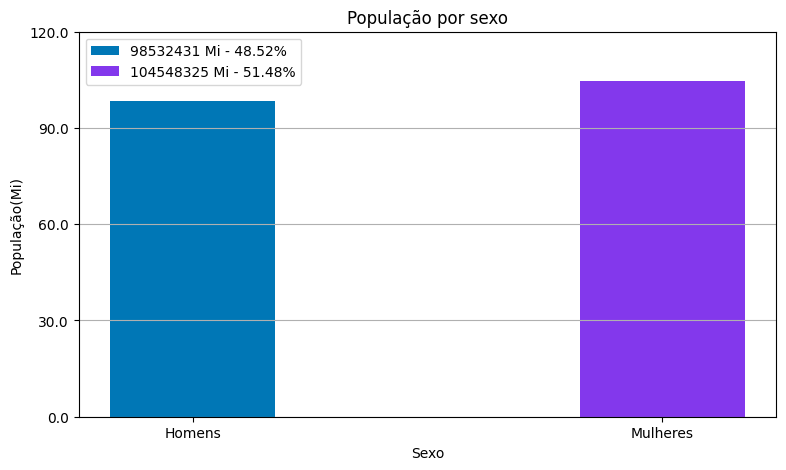

In [60]:
homens_populacao = soma_sexo.iloc[0, 1]
mulheres_populacao = soma_sexo.iloc[1, 1]

homens_dado = soma_sexo.iloc[0, 0]
mulheres_dado = soma_sexo.iloc[1, 0]

homens_percentual = f"{percentual['homens']:.2f}%"
mulheres_percentual = f"{percentual['mulheres']:.2f}%"

plt.figure(figsize=(9, 5))

# tornado os dados do eixo y legível
valor_y = np.arange(0, 130e6, 30e6)

# plotando os dados
plt.bar(homens_dado, homens_populacao, width=0.35, color='#0077b6', label=f'{homens_populacao} Mi - {homens_percentual}')
plt.bar(mulheres_dado, mulheres_populacao, width=0.35, color='#8338ec', label=f'{mulheres_populacao} Mi - {mulheres_percentual}')

# configurando o valor do eixo y
plt.yticks(valor_y, [var / 1e6 for var in valor_y])

# configurando legenda
plt.legend()

plt.grid(axis='y')
plt.title('População por sexo')
plt.xlabel('Sexo')
plt.ylabel('População(Mi)')

plt.show()